Module 5. Task 3-Build and Evaluate Models
ELT

In [33]:
#libraries
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pyplot as pltfig
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats
from scipy.integrate import trapz
from pandas import Series, DataFrame
import sklearn
import scipy
from math import sqrt

#estimators 
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVR
from sklearn.svm import SVC
from sklearn import linear_model
from sklearn import preprocessing

#model metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

#cross validation
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split

I. Regression

1. Selecting and dividing the data

In [34]:
#data
rawData = pd.read_csv('default of credit card clients.csv', header=0)
rawData.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [35]:
rawData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int64
BILL_AMT6               

In [36]:
#data types
rawData['SEX'].replace("1", "Male")
rawData['SEX'].replace("2", "Female")
rawData['EDUCATION'].replace("1", "Graduate school")
rawData['EDUCATION'].replace("2", "University")
rawData['EDUCATION'].replace("3", "High school")
rawData['EDUCATION'].replace("4", "Others")
rawData['EDUCATION'].replace("5", "Others")
rawData['EDUCATION'].replace("6", "Others")
rawData['EDUCATION'].replace("0", "Others")
rawData['MARRIAGE'].replace("0", "Others")
rawData['MARRIAGE'].replace("1", "Married")
rawData['MARRIAGE'].replace("2", "Single")
rawData['MARRIAGE'].replace("3", "Divorce")
rawData['default payment next month'].replace("0", "No")
rawData['default payment next month'].replace("1", "Yes")
rawData['LIMIT_BAL']= rawData['LIMIT_BAL'].astype('float')
rawData['SEX']= rawData['SEX'].astype('category')
rawData['EDUCATION']= rawData['EDUCATION'].astype('category')
rawData['MARRIAGE']= rawData['MARRIAGE'].astype('category')
rawData['AGE']= rawData['AGE'].astype('int')
rawData['PAY_0']= rawData['PAY_0'].astype('category')
rawData['PAY_2']= rawData['PAY_2'].astype('category')
rawData['PAY_3']= rawData['PAY_3'].astype('category')
rawData['PAY_4']= rawData['PAY_4'].astype('category')
rawData['PAY_5']= rawData['PAY_5'].astype('category')
rawData['PAY_6']= rawData['PAY_6'].astype('category')
rawData['BILL_AMT1']= rawData['BILL_AMT1'].astype('float')
rawData['BILL_AMT2']= rawData['BILL_AMT2'].astype('float')
rawData['BILL_AMT3']= rawData['BILL_AMT3'].astype('float')
rawData['BILL_AMT4']= rawData['BILL_AMT4'].astype('float')
rawData['BILL_AMT5']= rawData['BILL_AMT5'].astype('float')
rawData['BILL_AMT6']= rawData['BILL_AMT6'].astype('float')
rawData['PAY_AMT1']= rawData['PAY_AMT1'].astype('float')
rawData['PAY_AMT2']= rawData['PAY_AMT2'].astype('float')
rawData['PAY_AMT3']= rawData['PAY_AMT3'].astype('float')
rawData['PAY_AMT4']= rawData['PAY_AMT4'].astype('float')
rawData['PAY_AMT5']= rawData['PAY_AMT5'].astype('float')
rawData['PAY_AMT6']= rawData['PAY_AMT6'].astype('float')
rawData['default payment next month']= rawData['default payment next month'].astype('category')

In [37]:
rawData
rawData.dtypes

ID                               int64
LIMIT_BAL                      float64
SEX                           category
EDUCATION                     category
MARRIAGE                      category
AGE                              int64
PAY_0                         category
PAY_2                         category
PAY_3                         category
PAY_4                         category
PAY_5                         category
PAY_6                         category
BILL_AMT1                      float64
BILL_AMT2                      float64
BILL_AMT3                      float64
BILL_AMT4                      float64
BILL_AMT5                      float64
BILL_AMT6                      float64
PAY_AMT1                       float64
PAY_AMT2                       float64
PAY_AMT3                       float64
PAY_AMT4                       float64
PAY_AMT5                       float64
PAY_AMT6                       float64
default payment next month    category
dtype: object

In [38]:
variableName = rawData.iloc[1,2]

In [39]:
variableName = rawData['LIMIT_BAL']

In [40]:
variableName = rawData.iloc[:,0:4]

In [41]:
#1Re.features
features = rawData.iloc[:,12:23]
print('Summary of feature sample')
features.head()

Summary of feature sample


,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5
0,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0
1,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0
2,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0
3,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0
4,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0


In [42]:
#2Re.Dependent Variable
depVar = rawData['PAY_AMT6']

In [43]:
#3Re.training set for the X-variables or Feature space (70/30)
X_train = (features[: 1000])
X_train.head()

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5
0,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0
1,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0
2,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0
3,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0
4,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0


In [44]:
#4Re.training set for the Y-variable or dependent variable
y_train = depVar[: 1000]
y_train_count = len(y_train.index)
print('The number of observations in the Y training set are:',str(y_train_count))
y_train.head()

The number of observations in the Y training set are: 1000


0       0.0
1    2000.0
2    5000.0
3    1000.0
4     679.0
Name: PAY_AMT6, dtype: float64

In [45]:
#5Re.testing set for the X-Variables or Feature space
X_test = features[-100:]
X_test_count = len(X_test.index)
print('The number of observations in the feature testing set is:',str(X_test_count))
print(X_test.head())

The number of observations in the feature testing set is: 100
       BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4  BILL_AMT5  BILL_AMT6  \
29900    16809.0        0.0        0.0        0.0        0.0        0.0   
29901    50845.0    48750.0   103486.0    50590.0    50248.0    49387.0   
29902    10392.0   168088.0   168955.0   161351.0   126198.0   124746.0   
29903    27378.0    17082.0    13333.0       99.0       99.0   172104.0   
29904    54952.0    56021.0    54126.0    58732.0    59306.0    59728.0   

       PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  
29900       0.0       0.0       0.0       0.0       0.0  
29901       0.0    6556.0    3250.0    1563.0    1208.0  
29902  168096.0    6409.0    7335.0    4448.0    4519.0  
29903   10018.0   13333.0      99.0      99.0  172104.0  
29904    2600.0    4553.0    5800.0    2000.0    1000.0  


In [46]:
#6Re.Ground truth 
y_test = depVar[-100:]
y_test_count = len(y_test.index)
print('The number of observations in the Y training set are:',str(y_test_count))
y_test.head()

The number of observations in the Y training set are: 100


29900        0.0
29901      781.0
29902     5003.0
29903    30013.0
29904     1462.0
Name: PAY_AMT6, dtype: float64

In [47]:
#7Re.Cross validation variable y= dependiente*revisar x features y am

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train)

In [49]:
X_train.shape, X_test.shape

((750, 11), (250, 11))

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train)
X_train.shape, X_test.shape

((562, 11), (188, 11))

In [51]:
#8Re.Tuning Parameters and Model Definition
model = LinearRegression(fit_intercept=True, normalize=False, copy_X=True, n_jobs=10)

2. Building the models and choosing the right model

In [52]:
#9Re.Models
modelRFR = RandomForestRegressor()
modelSVR = SVR()
modelLinearR = LinearRegression()

In [53]:
#Tuning parameters
#2.3. Re.Establish a variable specifically for your features so you will have full control over what is being used for training 
#features
features = rawData.iloc[:,12:23]
print('Summary of feature sample')
features.head()

Summary of feature sample


,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5
0,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0
1,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0
2,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0
3,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0
4,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0


In [54]:
#2.4. Re.Validate that the correct column is being used for the dependent variable
#dependent variable
print(depVar)

0           0.0
1        2000.0
2        5000.0
3        1000.0
4         679.0
          ...  
29995    1000.0
29996       0.0
29997    3100.0
29998    1804.0
29999    1000.0
Name: PAY_AMT6, Length: 30000, dtype: float64


In [55]:
#2.5. Re.Use the model variables you established in step 2  pass the training data
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=10, normalize=False)

In [56]:
#2.6. Re.Random Forest
modelRFR.fit(X_train,y_train)

/Users/ell/opt/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [57]:
#2.7. Re.Support Vector Regression
modelSVR.fit(X_train,y_train)

/Users/ell/opt/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [58]:
#2.8. Re.Linear Regression
modelLinearR.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [59]:
#2.9.Re.Choosing the Right Model
print(cross_val_score(modelRFR, X_train, y_train)) 

#These values correspond to the the following:
#1st value:  The score array for test scores on each cv split. (Higher is an indicator of a better performing model)
#2nd value: The time for fitting the estimator on the train set for each cv split.
#3rd Value:  The time for scoring the estimator on the test set for each cv split. 

[ 1.42754071e-01 -9.01550430e+00  1.36784673e-03]


/Users/ell/opt/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


In [60]:
model.score(X_train,y_train)

0.6065612935860709

In [61]:
#2.9.1. Re.Random Forest Regression Model Fitting and Scoring
#Model Fitting
modelRFR.fit(X_train,y_train)
print(cross_val_score(modelRFR, X_train, y_train))
modelRFR.score(X_train,y_train)

[  0.04016028 -11.20892117   0.01610517]


/Users/ell/opt/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


0.9023444827555567

In [62]:
#2.9.2. Support Vector Regression Model Fitting and Scoring
modelSVR.fit(X_train,y_train)
print(cross_val_score(modelSVR, X_train, y_train)) 
modelSVR.score(X_train,y_train)

[-0.06884288 -0.08725674 -0.0149867 ]


/Users/ell/opt/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/ell/opt/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/ell/opt/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/ell/opt/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The defaul

-0.021237962917300512

In [63]:
#2.9.3. Re.Linear Regression Model Fitting and Scoring
modelLinearR.fit(X_train,y_train)
print(cross_val_score(modelLinearR, X_train, y_train)) 
modelLinearR.score(X_train,y_train)

[-1.03473501 -4.88061776  0.14942029]


/Users/ell/opt/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


0.6065612935860709

3. Making predictions and evaluating the results

In [64]:
# 3.4. Re.Making predictions / Evaluating the results
#RFR
predictionsRFR = modelRFR.predict(X_test)
predRsquared = r2_score(y_test,predictionsRFR)
rmse = sqrt(mean_squared_error(y_test, predictionsRFR))
print('R Squared: %.3f' % predRsquared)
print('RMSE: %.3f' % rmse)

R Squared: -0.012
RMSE: 27263.218


In [65]:
#SVR
predictionsSVR = modelSVR.predict(X_test)
predRsquared = r2_score(y_test,predictionsSVR)
rmse = sqrt(mean_squared_error(y_test, predictionsSVR))
print('R Squared: %.3f' % predRsquared)
print('RMSE: %.3f' % rmse)

R Squared: -0.022
RMSE: 27387.517


In [66]:
#LinearR
predictionsLinearR = modelLinearR.predict(X_test)
predRsquared = r2_score(y_test,predictionsLinearR)
rmse = sqrt(mean_squared_error(y_test, predictionsLinearR))
print('R Squared: %.3f' % predRsquared)
print('RMSE: %.3f' % rmse)

R Squared: 0.480
RMSE: 19536.120


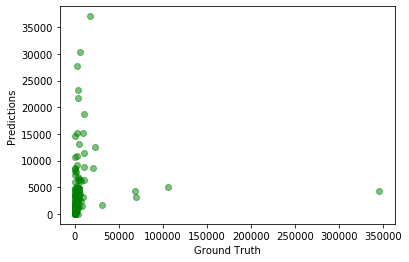

In [67]:
#Plotting the Results
#3.5. create a simple scatter plot using matplotlib & save figure
#RFR
plt.scatter(y_test, predictionsRFR, color=['green'], alpha = 0.5)
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.savefig('00.RFR.png', dpi=300, bbox_inches='tight')
plt.show();

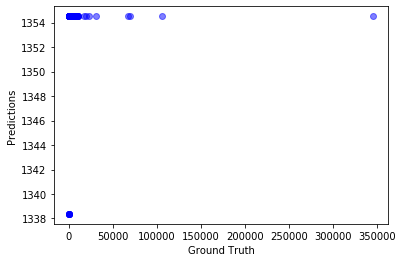

In [68]:
#SVR
plt.scatter(y_test, predictionsSVR, color=['blue'], alpha = 0.5)
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.savefig('01.SVR.png', dpi=300, bbox_inches='tight')
plt.show();

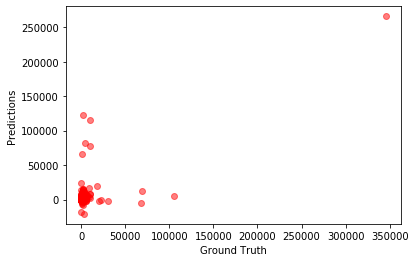

In [69]:
#LinearR
plt.scatter(y_test, predictionsLinearR, color=['red'], alpha = 0.5)
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.savefig('02.LinearR.png', dpi=300, bbox_inches='tight')
plt.show();

II. Classification

In [70]:
#1Cla.features
features = rawData.iloc[:,1:24]
print('Summary of feature sample')
features.head()

Summary of feature sample


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0
1,120000.0,2,2,2,26,-1,2,0,0,0,...,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0
2,90000.0,2,2,2,34,0,0,0,0,0,...,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
3,50000.0,2,2,1,37,0,0,0,0,0,...,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0
4,50000.0,1,2,1,57,-1,0,-1,0,0,...,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0


In [71]:
#2Cla.dependent Variable
depVar = rawData['default payment next month']

In [72]:
#3Cla.training set for the X-variables or Feature space (70/30)
X_train = (features[: 1000])
X_train.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0
1,120000.0,2,2,2,26,-1,2,0,0,0,...,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0
2,90000.0,2,2,2,34,0,0,0,0,0,...,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
3,50000.0,2,2,1,37,0,0,0,0,0,...,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0
4,50000.0,1,2,1,57,-1,0,-1,0,0,...,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0


In [73]:
#4Cla. training set for the Y-variable or dependent variable
y_train = depVar[: 1000]
y_train_count = len(y_train.index)
print('The number of observations in the Y training set are:',str(y_train_count))
y_train.head()

The number of observations in the Y training set are: 1000


0    1
1    1
2    0
3    0
4    0
Name: default payment next month, dtype: category
Categories (2, int64): [0, 1]

In [74]:
#5Cla.testing set for the X-Variables or Feature space
X_test = features[-100:]
X_test_count = len(X_test.index)
print('The number of observations in the feature testing set is:',str(X_test_count))
print(X_test.head())

The number of observations in the feature testing set is: 100
       LIMIT_BAL SEX EDUCATION MARRIAGE  AGE PAY_0 PAY_2 PAY_3 PAY_4 PAY_5  \
29900    20000.0   1         2        2   29     0     0    -2    -2    -2   
29901    50000.0   1         2        2   29     1     2     0     0     0   
29902   170000.0   1         3        2   30     0    -1     0     0     0   
29903   260000.0   1         1        1   30    -1     0    -1    -1    -1   
29904    60000.0   1         3        2   30     0     0     0     0     0   

       ... BILL_AMT3  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  \
29900  ...       0.0        0.0        0.0        0.0       0.0       0.0   
29901  ...  103486.0    50590.0    50248.0    49387.0       0.0    6556.0   
29902  ...  168955.0   161351.0   126198.0   124746.0  168096.0    6409.0   
29903  ...   13333.0       99.0       99.0   172104.0   10018.0   13333.0   
29904  ...   54126.0    58732.0    59306.0    59728.0    2600.0    4553.0   

      

In [75]:
#6Cla.Ground truth 
y_test = depVar[-100:]
y_test_count = len(y_test.index)
print('The number of observations in the Y training set are:',str(y_test_count))
y_test.head()

The number of observations in the Y training set are: 100


29900    1
29901    0
29902    0
29903    0
29904    1
Name: default payment next month, dtype: category
Categories (2, int64): [0, 1]

In [76]:
#7Cla.Cross validation variable y= dependiente*revisar x features y am
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train)
X_train.shape, X_test.shape

((750, 23), (250, 23))

In [77]:
#8Cla.Models
modelRFC = RandomForestClassifier()
modelSVC = SVC()
modelLogisticR = LogisticRegression(max_iter = 200)

In [78]:
#9Cla.Models fit
modelRFC.fit(X_train,y_train)
modelSVC.fit(X_train,y_train)
modelLogisticR.fit(X_train,y_train)

/Users/ell/opt/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/ell/opt/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/ell/opt/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=200,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [79]:
#10Cla.Model Fitting and scoring
#RFC
modelRFC.fit(X_train,y_train)
print(cross_val_score(modelRFC, X_train, y_train))
modelRFC.score(X_train,y_train)

[0.77290837 0.756      0.80321285]


/Users/ell/opt/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


0.976

In [80]:
#SVC
modelSVC.fit(X_train,y_train)
print(cross_val_score(modelSVC, X_train, y_train)) 
modelSVC.score(X_train,y_train)

/Users/ell/opt/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/ell/opt/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/ell/opt/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/ell/opt/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The defaul

[0.78087649 0.78       0.78313253]


0.9986666666666667

In [81]:
#LogisticR
modelLogisticR.fit(X_train,y_train)
print(cross_val_score(modelLogisticR, X_train, y_train)) 
modelLogisticR.score(X_train,y_train)

/Users/ell/opt/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/ell/opt/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/ell/opt/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/ell/opt/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/ell/opt/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432

[0.76095618 0.784      0.77911647]


0.7826666666666666

In [82]:
#11Cla.Make Predictions / Evaluating the results
#RFC
predictionsRFC = modelRFC.predict(X_test)
score = modelRFC.score(X_test, y_test)
print(score)

0.808


In [83]:
#SVC
predictionsSVC = modelSVC.predict(X_test)
score = modelSVC.score(X_test, y_test)
print(score)

0.8


In [84]:
#LogisticR
predictionsLogisticR = modelLogisticR.predict(X_test)
score = modelLogisticR.score(X_test, y_test)
print(score)

0.804


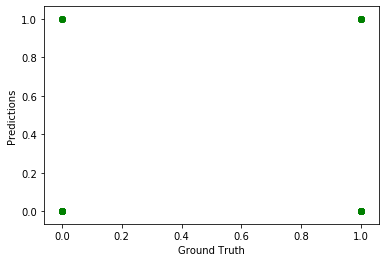

In [85]:
#12Cla.Plotting the Results 
#RFC
plt.scatter(y_test, predictionsRFC, color=['green'], alpha = 0.5)
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.savefig('03.RFC.png', dpi=300, bbox_inches='tight')
plt.show();

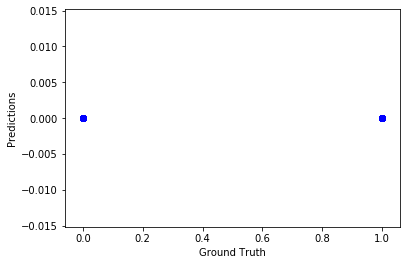

In [86]:
#SVC
plt.scatter(y_test, predictionsSVC, color=['blue'], alpha = 0.5)
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.savefig('04.SVC.png', dpi=300, bbox_inches='tight')
plt.show();

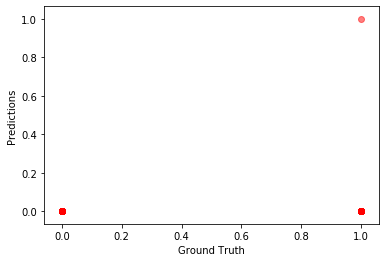

In [87]:
#LogisticR
plt.scatter(y_test, predictionsLogisticR, color=['red'], alpha = 0.5)
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.savefig('05.LogisticR.png', dpi=300, bbox_inches='tight')
plt.show();

In [88]:
#ANTES DE MODELS_REGRESSION
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#print(scaler.fit(X_train))
#StandardScaler()
#print(scaler.mean_)
#print(scaler.transform(X_train))

In [89]:
#Aply model to dataframe
#df = pd.DataFrame(regr.predict(diabetes_X_test))
#print(df)
#ypred = pd.DataFrame({'pred_lin_regr': pd.Series(clf.predict(Xtest))})

In [90]:
#rawData = pd.rawData(regr.predict(diabetes_X_test))

In [91]:
#predictionsSVC = modelSVC.predict(X_test)

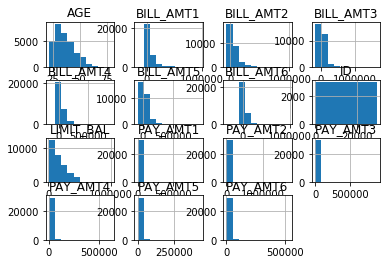

In [92]:
rawData.drop(['SEX'],1).hist()
plt.savefig('06.sex.png', dpi=300, bbox_inches='tight')
plt.show();

/Users/ell/opt/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


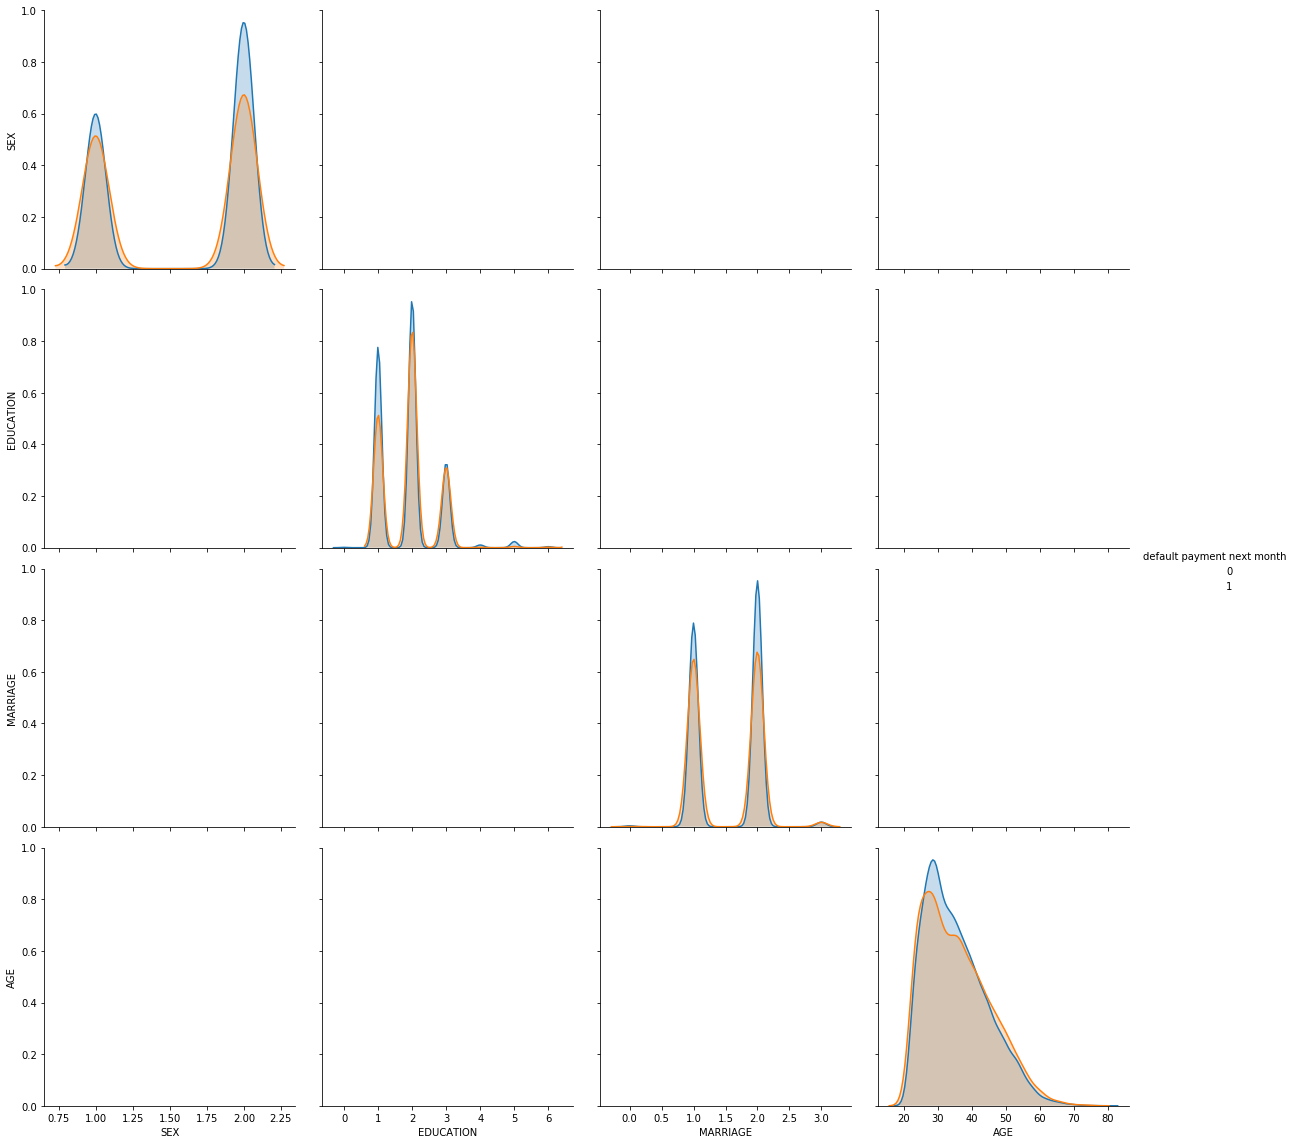

In [93]:
sns.pairplot(rawData.dropna(), hue='default payment next month',size=4,vars=["SEX", "EDUCATION","MARRIAGE","AGE"],kind='LIMIT_BAL')
plt.savefig('07.default.png', dpi=300, bbox_inches='tight')
plt.show();